<a href="https://colab.research.google.com/github/AtaruOhto/google-colab-sandbox/blob/master/lightbgm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
"""
出典
UCI Bank Marketing Data Set
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
"""


# Zipファイルをダウンロード
import os

bank_zip_file = "./bank.zip"

if not os.path.exists(bank_zip_file):
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip


In [99]:
# ダウンロードした ZipFileを解凍
import zipfile
extract_dest_dir = "./data"

if not os.path.exists(extract_dest_dir):
  with zipfile.ZipFile(bank_zip_file) as zip:
    zip.extractall(extract_dest_dir)

In [100]:
# データ構造を表示
import pandas as pd

original = pd.read_csv("./data/bank-full.csv", sep=";")
original.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [101]:
# データ前処理 (欠損値の確認)

print(original.isnull())

print(original.isnull().sum())

original.info()

         age    job  marital  education  ...  pdays  previous  poutcome      y
0      False  False    False      False  ...  False     False     False  False
1      False  False    False      False  ...  False     False     False  False
2      False  False    False      False  ...  False     False     False  False
3      False  False    False      False  ...  False     False     False  False
4      False  False    False      False  ...  False     False     False  False
...      ...    ...      ...        ...  ...    ...       ...       ...    ...
45206  False  False    False      False  ...  False     False     False  False
45207  False  False    False      False  ...  False     False     False  False
45208  False  False    False      False  ...  False     False     False  False
45209  False  False    False      False  ...  False     False     False  False
45210  False  False    False      False  ...  False     False     False  False

[45211 rows x 17 columns]
age          0
job       

In [235]:
# オリジナルを保存しておく。コピーでオリジナルのデータフレームをメモリ上に退避させておく

df = original.copy()

In [236]:
# One Hot Encoding
# df = pd.get_dummies(original, drop_first=True, columns=["contact"])
del df["job"]
del df["default"]
del df["poutcome"]
del df["marital"]
del df["education"]

del df["contact"]

del df["previous"]
df

,age,balance,housing,loan,day,month,duration,campaign,pdays,y
0,58,2143,yes,no,5,may,261,1,-1,no
1,44,29,yes,no,5,may,151,1,-1,no
2,33,2,yes,yes,5,may,76,1,-1,no
3,47,1506,yes,no,5,may,92,1,-1,no
4,33,1,no,no,5,may,198,1,-1,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,825,no,no,17,nov,977,3,-1,yes
45207,71,1729,no,no,17,nov,456,2,-1,yes
45208,72,5715,no,no,17,nov,1127,5,184,yes
45209,57,668,no,no,17,nov,508,4,-1,no


In [237]:
# [yes, no] を [1, 0]に変換
def zero2one(column):
  return column.map({"yes": 1, "no": 0})

# df["default"] = zero2one(original["default"])
df["housing"] = zero2one(original["housing"])
df["loan"] = zero2one(original["loan"])
df["y"] = zero2one(original["y"])

In [238]:
# 月を数値に変換
df["month"] = original["month"].map({"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12})


In [239]:
df

,age,balance,housing,loan,day,month,duration,campaign,pdays,y
0,58,2143,1,0,5,5,261,1,-1,0
1,44,29,1,0,5,5,151,1,-1,0
2,33,2,1,1,5,5,76,1,-1,0
3,47,1506,1,0,5,5,92,1,-1,0
4,33,1,0,0,5,5,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,825,0,0,17,11,977,3,-1,1
45207,71,1729,0,0,17,11,456,2,-1,1
45208,72,5715,0,0,17,11,1127,5,184,1
45209,57,668,0,0,17,11,508,4,-1,0


In [240]:
y = df["y"]
X = df.drop("y", axis=1)

In [241]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)

In [262]:

param = {
    'objective': 'binary', 
    "metric": "auc", 
    "learning_rate": 0.3,
    "min_data_in_leaf": 30,
    "max_depth": 10,
    "n_estimators": 100,
    "num_leaves": 30,
    "objective": "binary",
    'num_iterations' : 1000,
    'early_stopping_rounds' : 100,    
}

 
# ・num_leaves
# 決定木の複雑度。num_leavesの値が高すぎると過学習となり、低すぎると未学習になる。max_depthと一緒に調整すると良いらしい。
# ・min_data_in_leaf
# 決定木のノード（葉）の最小データ数。値が高いと決定木が深く育つのを抑えるため過学習防ぐが、逆に未学習となる場合もある。min_data_in_leafは訓練データのレコード数とnum_leavesに大きく影響されるらしい。
# ・max_depth
# 決定木の深さを指定するハイパーパラメータ。他のハイパーパラメータとの兼ね合いが重要らしい。

model = lgb.train(
    params,
    lgb_train,
    valid_sets=(lgb_train, lgb_eval),
    verbose_eval=50
)


 
  



[50]	training's binary_logloss: 0.188695	valid_1's binary_logloss: 0.20957
[100]	training's binary_logloss: 0.167998	valid_1's binary_logloss: 0.20649


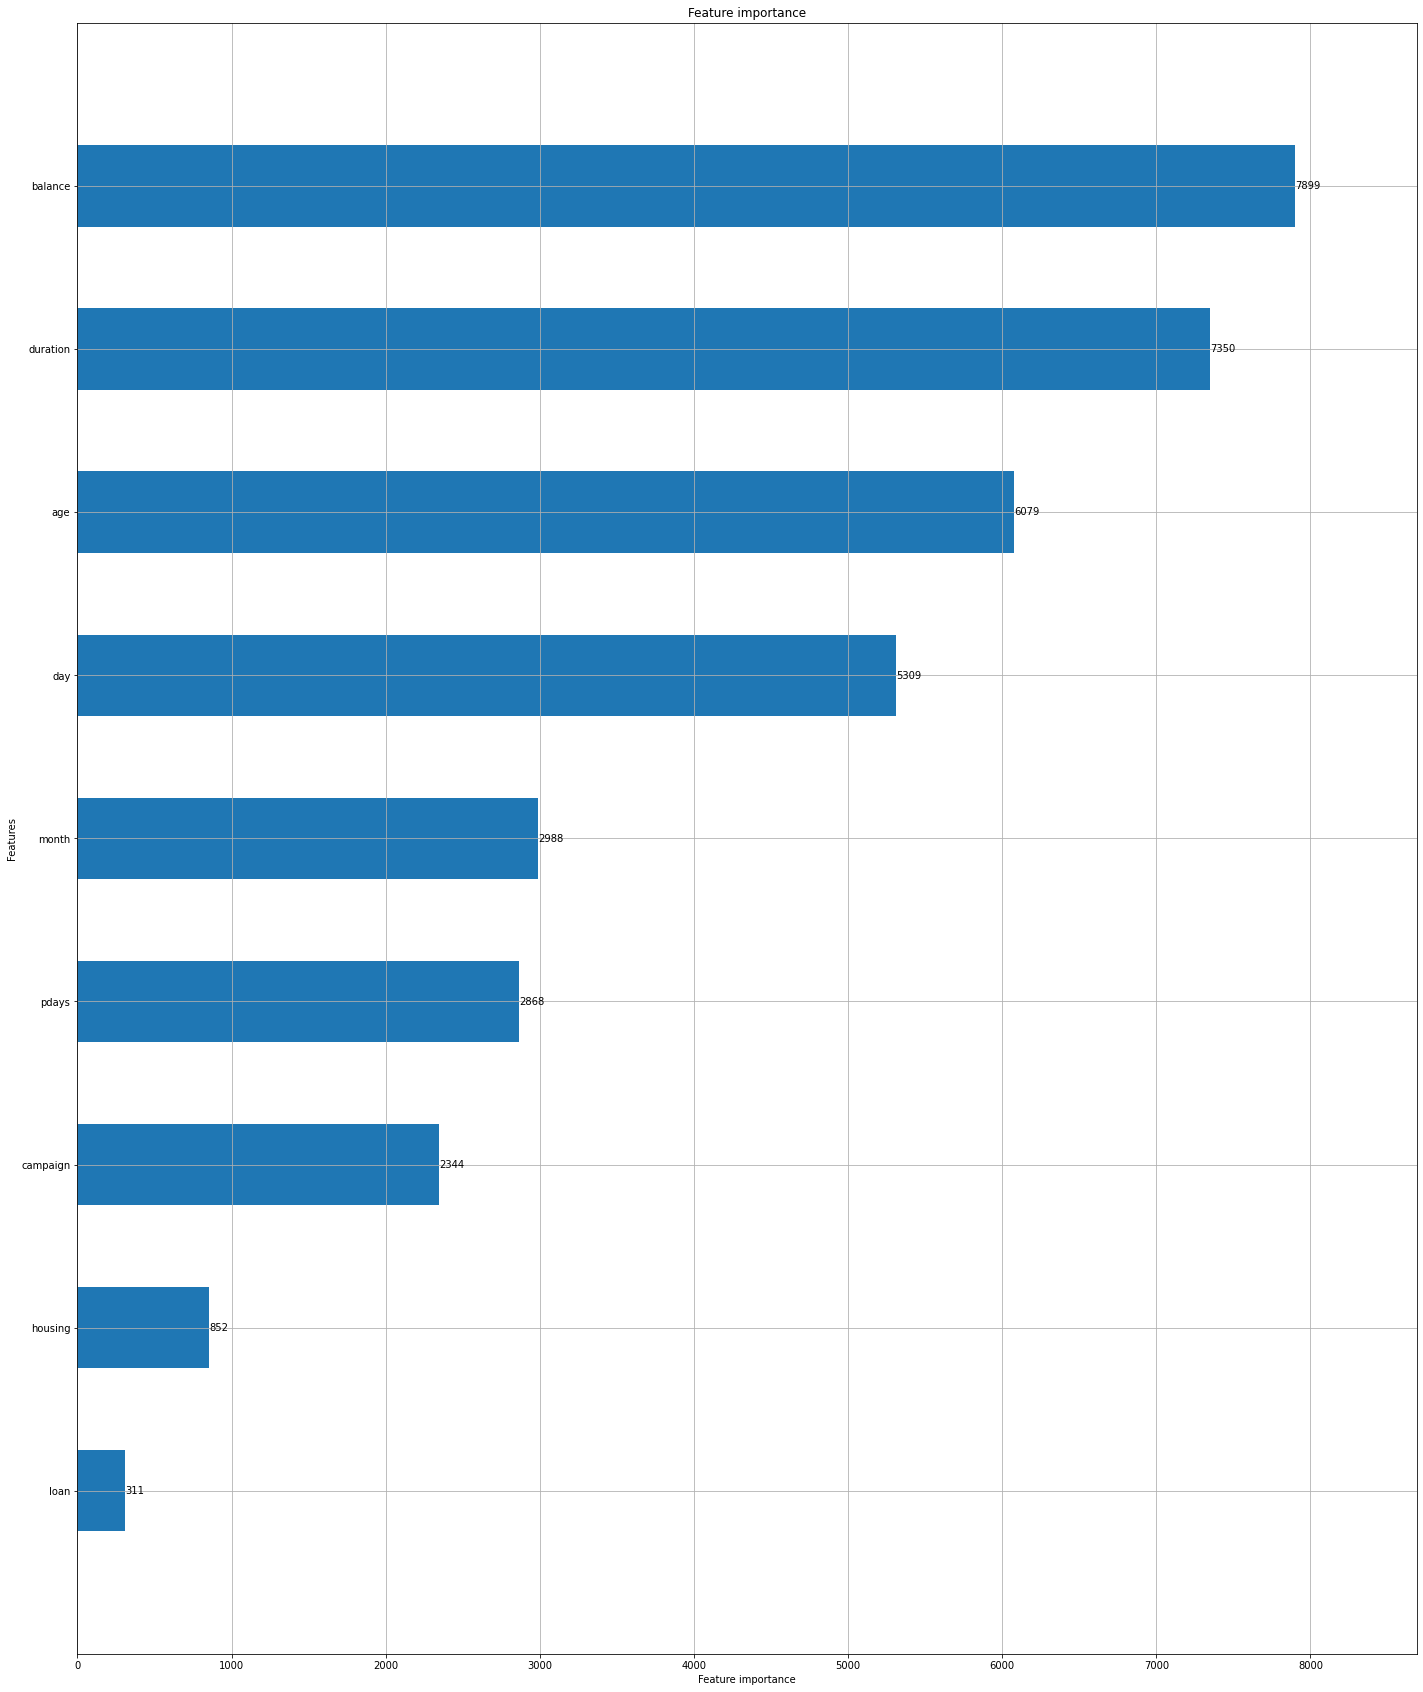

In [263]:
lgb.plot_importance(gbm, height=0.5, figsize=(24, 30))

0.9264596167323045


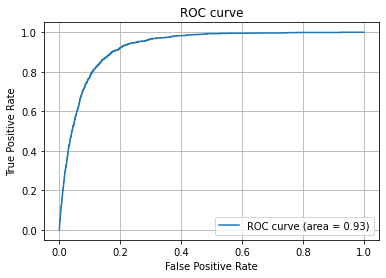

In [267]:
model.save_model('model.txt')

# テストデータを予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# 保存したモデルを使う場合はこんな感じ
#bst = lgb.Booster(model_file='model.txt')
#ypred = bst.predict(X_test, num_iteration=bst.best_iteration)

# AUC (Area Under the Curve) を計算する
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)


import matplotlib.pyplot as plt
%matplotlib inline
# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)